In [2]:
from synthesizer.grid import Grid
from unyt import Msun, h, c
import numpy as np
from matplotlib import pyplot as plt
import copy


Open the grid

In [3]:
disc_model = 'agnsed-limited'
grid_dir = "/Users/sw376/Dropbox/Research/data/synthesizer/grids/"
grid = Grid(
    grid_name=disc_model, 
    grid_dir=grid_dir,
    read_lines=False)



Define a grid point to use

In [4]:
mass = (1e8*Msun).to('kg').value
accretion_rate_eddington = 0.0
cosine_inclination=0.5

grid_point = grid.get_grid_point((mass,  accretion_rate_eddington,  cosine_inclination))

print(grid_point)

(np.int64(1), np.int64(0), np.int64(1))


Plot spectra

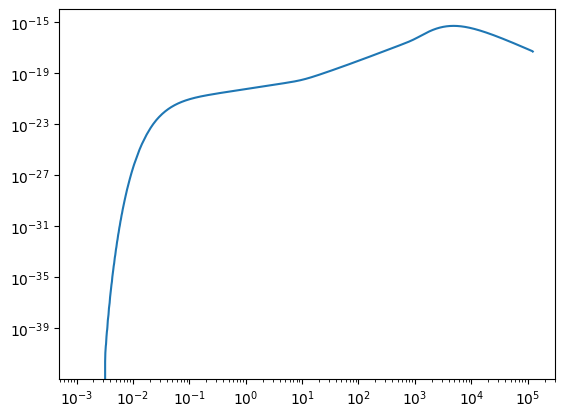

In [5]:
sed = grid.get_spectra(grid_point, spectra_id='incident')

plt.loglog(sed.lam.to('Angstrom').value, sed.lnu)
plt.show()

Save the frequency and luminosity

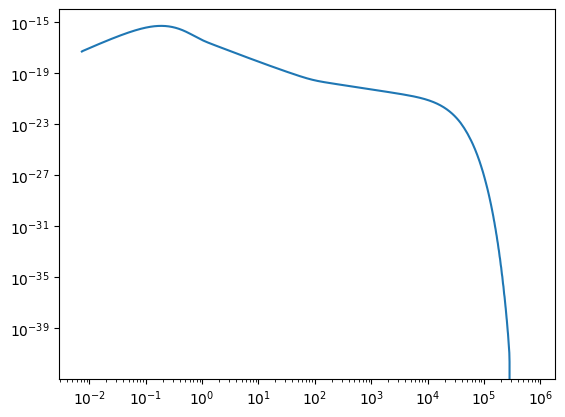

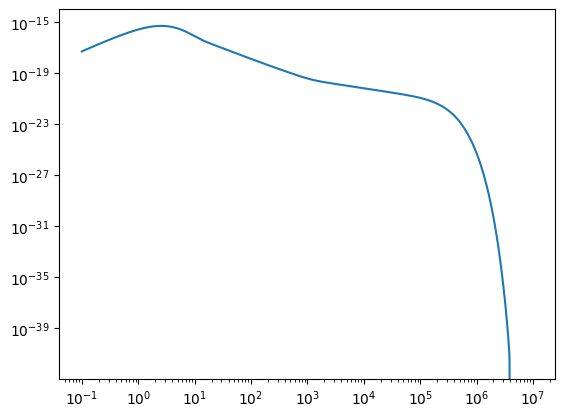

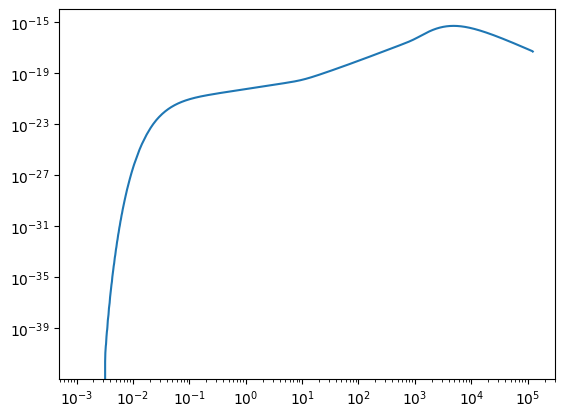

In [6]:

# define frequency
nu = c / sed.lam

# define energy
E = h * nu


lnu = sed.lnu

lnu[lnu==0.0] = 1E-100

# save tabulated spectrum
np.savetxt('1.sed', np.array([ E.to("Ry").value[::-1], lnu.to('erg/s/Hz').value[::-1]]).T)


plt.loglog(E.to("Ry").value[::-1], sed.lnu.to('erg/s/Hz').value[::-1])
plt.show()

plt.loglog(E.to("eV").value[::-1], sed.lnu.to('erg/s/Hz').value[::-1])
plt.show()

plt.loglog(sed.lam.to("Angstrom").value, sed.lnu.to('erg/s/Hz').value)
plt.show()


## Save with no-xrays



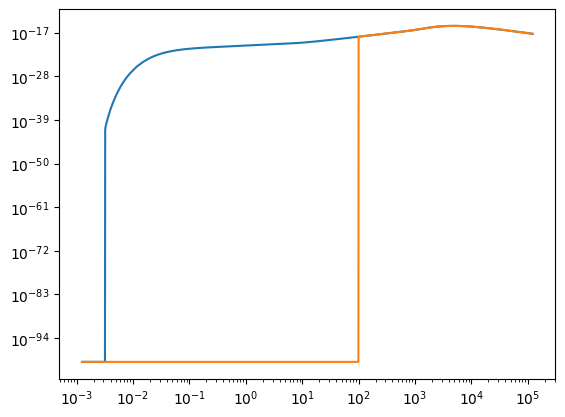

In [7]:
# save tabulated spectrum


from unyt import nm, Angstrom

xray_cutoff = 10 * nm

lam = copy.copy(sed.lam)

selection = lam < xray_cutoff

new_lnu = copy.copy(lnu.to('erg/s/Hz').value)

new_lnu[selection] = 1E-100

np.savetxt('1_no-xrays.sed', np.array([ E.to("Ry").value[::-1], new_lnu[::-1]]).T)

plt.loglog(lam, lnu.to('erg/s/Hz').value)
plt.loglog(lam, new_lnu)
plt.show()

## Save with 50eV cut to mimic stars

247.9683863043932 Å


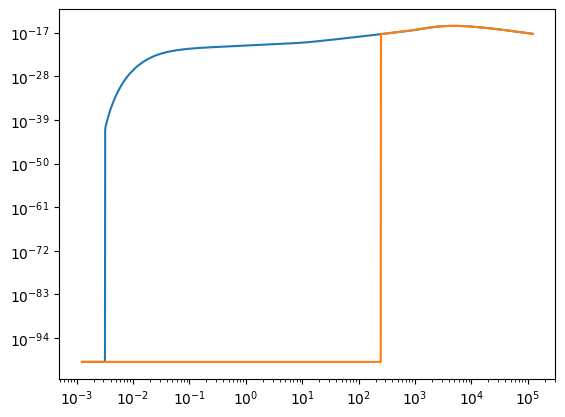

In [10]:
# save tabulated spectrum


from unyt import nm, Angstrom, eV, c, h

cutoff_energy = 50 * eV  
cutoff_nu = cutoff_energy / h
cutoff_lam = c / cutoff_nu

print(cutoff_lam.to('Angstrom'))

lam = copy.copy(sed.lam)

selection = lam < cutoff_lam

new_lnu = copy.copy(lnu.to('erg/s/Hz').value)

new_lnu[selection] = 1E-100

np.savetxt('1_50ev-cut.sed', np.array([ E.to("Ry").value[::-1], new_lnu[::-1]]).T)

plt.loglog(lam, lnu.to('erg/s/Hz').value)
plt.loglog(lam, new_lnu)
plt.show()